In [ ]:
import gc
from tqdm import tqdm
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot

import datetime as dt
from datetime import date
from datetime import timedelta
from fbprophet import Prophet

%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ADANIPORTS.csv to ADANIPORTS.csv


In [ ]:
df=pd.read_csv('ADANIPORTS.csv')
df.head(20)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
5,2007-12-04,MUNDRAPORT,EQ,969.30,985.00,1056.00,976.00,1049.00,1041.45,1015.39,4849250,4.923867e+14,NaN,1537667,0.3171
6,2007-12-05,MUNDRAPORT,EQ,1041.45,1061.00,1099.50,1050.00,1084.00,1082.45,1082.79,2848209,3.084010e+14,NaN,904260,0.3175
7,2007-12-06,MUNDRAPORT,EQ,1082.45,1089.00,1109.70,1051.00,1090.10,1081.30,1087.03,1749516,1.901771e+14,NaN,825691,0.4720
8,2007-12-07,MUNDRAPORT,EQ,1081.30,1100.00,1134.00,1078.00,1100.00,1102.40,1106.57,2247904,2.487465e+14,NaN,697763,0.3104
9,2007-12-10,MUNDRAPORT,EQ,1102.40,1110.00,1110.00,1061.10,1073.55,1075.40,1080.38,1012350,1.093727e+14,NaN,417514,0.4124


In [ ]:
data0 = pd.read_csv('ADANIPORTS.csv')
data0[-5:]

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


In [ ]:
data1=data0
data1['date']=pd.to_datetime(data1['Date'])
data1=data1.drop(['Date'],axis=1).reset_index(drop=True)
data1

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,date
0,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612,2007-11-27
1,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172,2007-11-28
2,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088,2007-11-29
3,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735,2007-11-30
4,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741,2007-12-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892,2021-04-26
3318,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865,2021-04-27
3319,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203,2021-04-28
3320,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942,2021-04-29


In [ ]:
data1=data0
data1['date']=pd.to_datetime(data1['Date'])
data1=data1.drop(['Date'],axis=1).reset_index(drop=True)
data1

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,date
0,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612,2007-11-27
1,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172,2007-11-28
2,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088,2007-11-29
3,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735,2007-11-30
4,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741,2007-12-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892,2021-04-26
3318,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865,2021-04-27
3319,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203,2021-04-28
3320,ADANIPORTS,EQ,746.25,753.20,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942,2021-04-29


In [ ]:
!pip install --upgrade mplfinance

     |████████████████████████████████| 70 kB 4.5 MB/s 


In [ ]:
data1a=data1.copy()
data1a.index=data1a['date']
data1a=data1a.drop('date',axis=1)
data1a

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
date,,,,,,,,,,,,,,
2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.00,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.00,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.00,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.00,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.00,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ADANIPORTS,EQ,725.35,733.00,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
2021-04-27,ADANIPORTS,EQ,730.75,735.00,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
2021-04-28,ADANIPORTS,EQ,749.15,755.00,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203


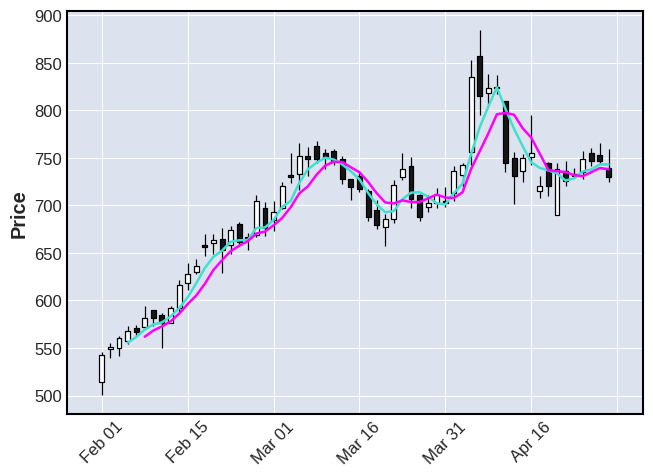

In [ ]:
import mplfinance as mpf
mpf.plot(data1a[-60:], type='candlestick',mav=(4,6))

In [ ]:
data2=data1[['date','Close']]
data2

,date,Close
0,2007-11-27,962.90
1,2007-11-28,893.90
2,2007-11-29,884.20
3,2007-11-30,921.55
4,2007-12-03,969.30
...,...,...
3317,2021-04-26,730.75
3318,2021-04-27,749.15
3319,2021-04-28,746.25
3320,2021-04-29,746.75


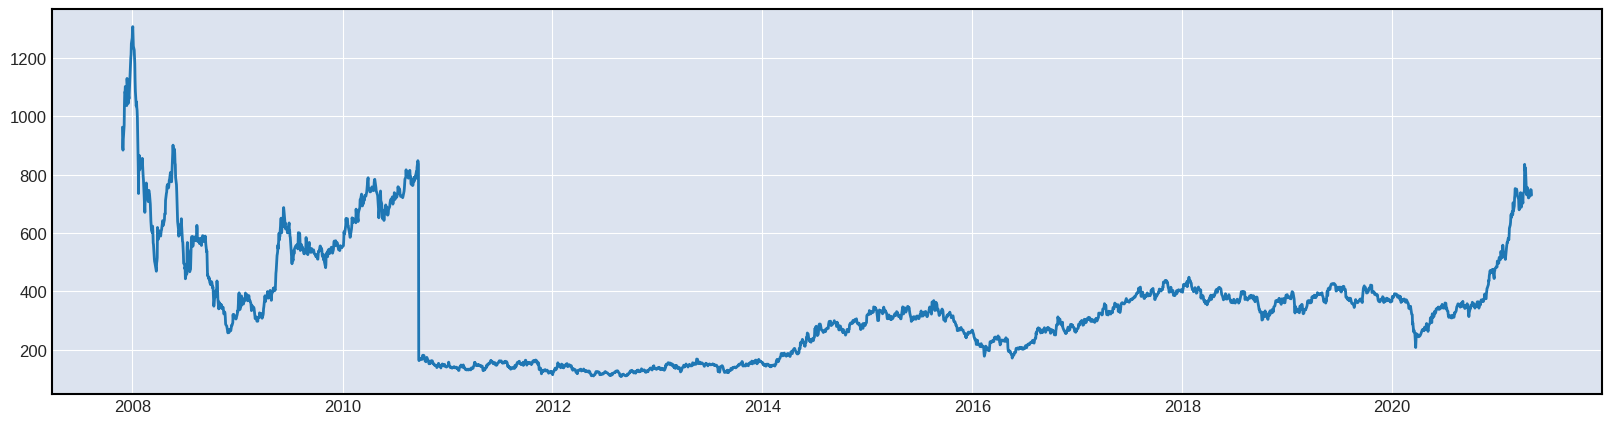

In [ ]:
item1=data2

item1.columns = ['ds','y']
item1.y = item1.y.astype('float')
item1.ds = item1.ds.astype('datetime64')

rcParams['figure.figsize'] = 20,5
plt.plot(item1.ds, item1.y)

In [ ]:
from datetime import timedelta
start0 = dt.datetime.strptime('2021-01-01','%Y-%m-%d').date()
end0   = dt.datetime.strptime('2022-12-31','%Y-%m-%d').date()
print((end0-start0).days)

729


In [ ]:
def daterange(start,end):
    for i in range((end-start).days):
        return start+timedelta(i)  

In [ ]:
dates0=[]
for i in range((end0-start0).days):
    dates0+=[(start0+timedelta(i)).strftime('%Y-%m-%d') ]
print(dates0[0:10])

['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10']


In [ ]:
dates0_df=pd.DataFrame(dates0)
dates0_df.columns=['ds']
dates0_df

,ds
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
...,...
724,2022-12-26
725,2022-12-27
726,2022-12-28
727,2022-12-29


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


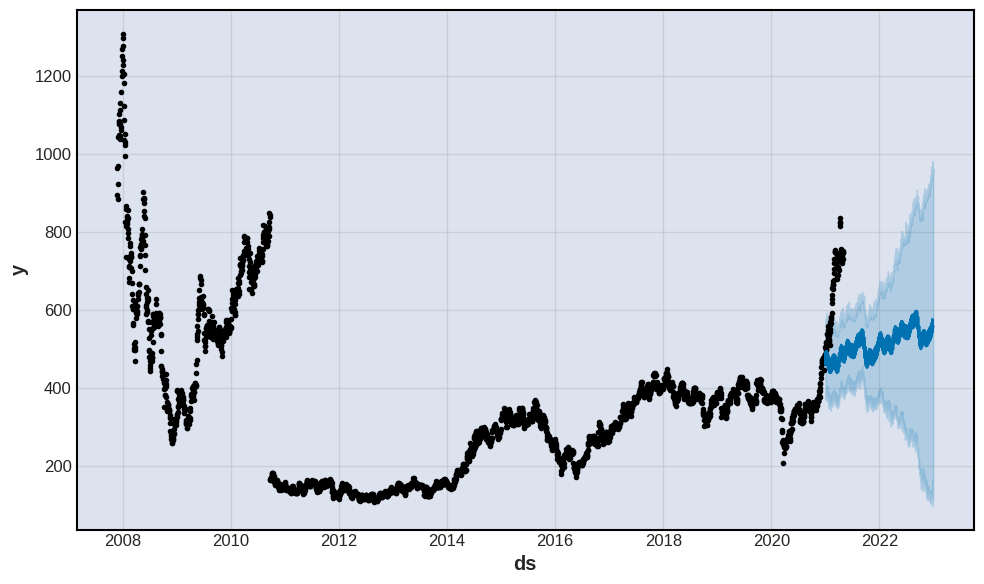

In [ ]:
ph = Prophet()
ph.fit(item1)
forecast3=ph.predict(dates0_df)
figure = ph.plot(forecast3)
figure.show()

In [ ]:
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
724,2022-12-26,551.620963,96.952654,957.232458
725,2022-12-27,553.756919,124.666114,966.786094
726,2022-12-28,554.594484,118.524580,956.394401
727,2022-12-29,556.613684,113.133134,943.311841
728,2022-12-30,557.932302,117.490995,962.987341
